

# Project: Investigate a Dataset (TMDB Movies Dataset!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Overview**: 
>In this project we analyze Data assiocated to TMDB_Movies Dataset.
>
>The dataset contains information about 10,000 movies collected from the movie datbase (TMDB), Including budget, revenue and so on, It consist of 21 columns.

**Questions That Can Analyized From This Dataset**:
>1-In Which Year There Was the Highest Average Revenue?
>
>2-Display Top 10 Highest Movie Title and Profit!
>    
>3-Display Top 10 Highest Movie Title and Revenue!
>    
>4-Display Top 10 Highest Movie Title and Budget!
>    
>5-Display Top 10 Lengthy Movie Title and Runtime!
>
>6-Display Number Of Movies Per Year!
>
>7-The Average Of Runtime Movies!
>
>8-The Most Popular Genre In TMDB Movies Dataset!
>
>9-Display Top 10 Voted Movies In TMDB Movies Dataset!


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Display the first 2 Rows in Dataset.
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
# Display the last 2 Rows in Dataset.
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
# Display General Inforamtions About This Dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

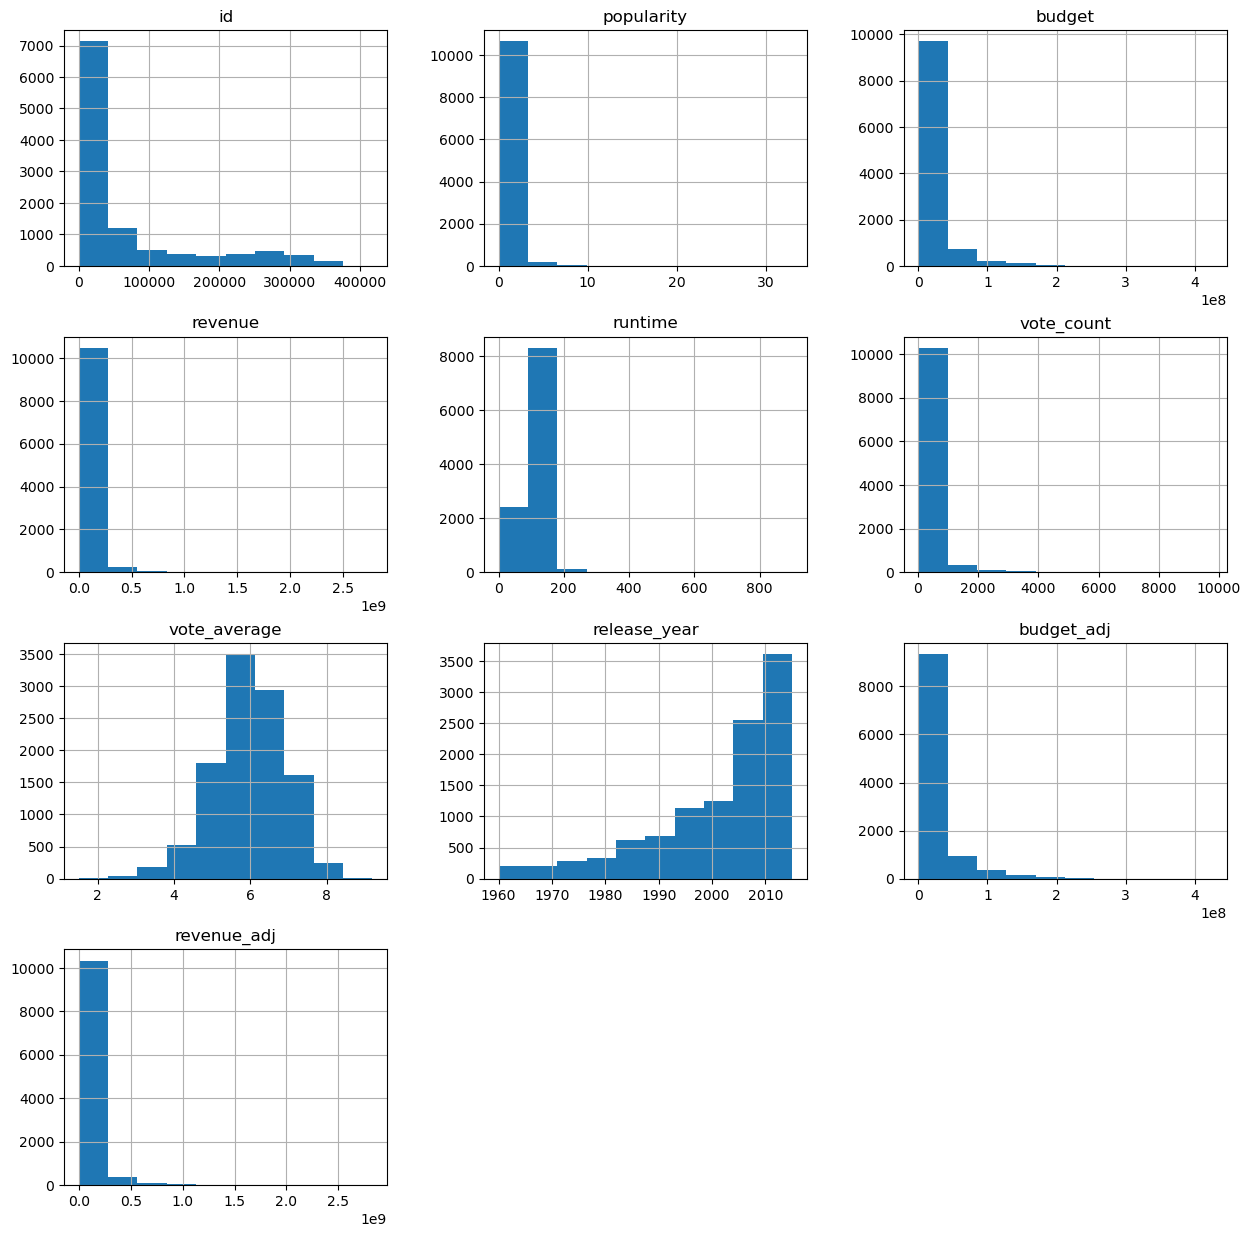

In [6]:
# Display histogram for all Numerical Data Frame.
df.hist(figsize=(15,15));

In [7]:
# Display Statistics for the Data Frame.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
# Display No.Of Null Values of The Data Frame.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
# Display no.of unique values of each features in this data frame.
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

> **Observation**:
>
>1-No unit of currency is mentioned in this data set, So for my analysis i will take it as Doller as it is the most popular international currency.
>
>2-I will add a new column called Profit = (Ruvenue - Budget)
>
>3-Vote_count is differnce from Vote_average So to use No.of votes in my analysis i will add a new column called Votes = (vote_count * Vote_averge)



### Data Cleaning (Removing the unused information from this dataset!)

In [10]:
# Display Columns Name.
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### Replace Zero Values from Budget & Revenue Columns to Median Values.

In [11]:
 df[df['budget']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.000000e+00


In [12]:
# Display Sum.Of Zero Values On Budget Column.
sum(df['budget']==0)

5696

In [13]:
# i will replace Zero value on budget with NAN value.
df['budget'] = df['budget'].replace(0, np.NAN)

In [14]:
# Display No.Of NAN Values on Budget Column.
df['budget'].isnull().sum()

5696

In [15]:
# i will replace NAN value on budget with Median_budget value.
budget_median = df['budget'].median()
df['budget'].fillna(budget_median,inplace=True)

In [16]:
# Display Sum.Of Zero Values On Revenue Column.
sum(df['revenue']==0)

6016

In [17]:
# i will replace Zero value on Revenue with NAN value.
df['revenue'] = df['revenue'].replace(0, np.NAN)

In [18]:
# Display No.Of NAN Values on Revenue Column.
df['revenue'].isnull().sum()

6016

In [19]:
# i will replace NAN value on revenue with Median_Revenue value.
revenue_median = df['revenue'].median()
df['revenue'].fillna(revenue_median,inplace=True)

In [20]:
# Display Sum.Of Zero Values On Runtime Column.
sum(df['runtime']==0)

31

In [21]:
# i will replace Zero value on Runtime with NAN value.
df['runtime'] = df['runtime'].replace(0, np.NAN)

In [22]:
# Check There Is any zero values on Runtime Column.
sum(df['runtime']==0)

0

In [23]:
# Display No.of NAN values on runtime column.
df['runtime'].isnull().sum()

31

#### Check is there any duplicated rows?

In [24]:
print("No Of Duplicated Rows:",sum(df.duplicated()))

No Of Duplicated Rows: 1


#### Removing Duplicates.

In [25]:
# Removing Duplicates.
df.drop_duplicates(inplace=True)

#### Check No.of Rows and Columns in dataset

In [26]:
df.shape

(10865, 21)

#### Convert release_date dtype from object to datetime.

In [27]:
#convert release_date from object to datetime.
df['release_date'] = pd.to_datetime(df['release_date'])

In [28]:
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

#### Removing Unused Columns From Data Frame
I Will Remove those columns from data frame [id,homepage,tagline,keywords,overview,budget_adj,revenue_adj]

In [29]:
df.drop(['id','homepage','tagline','keywords','overview','budget_adj','revenue_adj'], axis=1, inplace=True)

#### Check No.of Rows and Columns in new dataset

In [30]:
df.shape

(10865, 14)

In [31]:
# Display first 2 rows from data frame.
df.head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


#### Add a new Column called Profit in data frame.

In [32]:
# Add a new Column called Profit.
df.insert(4,"profit",df['revenue'] - df['budget'])

In [33]:
df.head(3)

,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,tt1392190,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,tt2908446,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015


In [34]:
df.shape

(10865, 15)

In [35]:
# No of Missing Value for Each Feature.
df.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
profit                     0
original_title             0
cast                      76
director                  44
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [36]:
# proportion of Missing Data
per_missing = df.isnull().sum() *100 / len(df)
per_missing

imdb_id                 0.092039
popularity              0.000000
budget                  0.000000
revenue                 0.000000
profit                  0.000000
original_title          0.000000
cast                    0.699494
director                0.404970
runtime                 0.285320
genres                  0.211689
production_companies    9.479982
release_date            0.000000
vote_count              0.000000
vote_average            0.000000
release_year            0.000000
dtype: float64

In [37]:
# Overview Stastistics about new  Data Frame.
df.describe()

,popularity,budget,revenue,profit,runtime,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04,10834.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,2.353657e+07,5.744940e+07,3.391282e+07,102.363855,217.399632,5.975012,2001.321859
std,1.000231,2.769628e+07,1.119707e+08,9.440772e+07,30.948225,575.644627,0.935138,12.813260
min,0.000065,1.000000e+00,2.000000e+00,-4.139124e+08,2.000000,10.000000,1.500000,1960.000000
25%,0.207575,1.700000e+07,3.182654e+07,1.182654e+07,90.000000,17.000000,5.400000,1995.000000
50%,0.383831,1.700000e+07,3.182654e+07,1.482654e+07,99.000000,38.000000,6.000000,2006.000000
75%,0.713857,1.700000e+07,3.182654e+07,2.362654e+07,112.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,900.000000,9767.000000,9.200000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (In Which Year There Was the Highest Average Revenue?)

In [38]:
df.columns

Index(['imdb_id', 'popularity', 'budget', 'revenue', 'profit',
       'original_title', 'cast', 'director', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year'],
      dtype='object')

In [39]:
# Display The Average Of Revenue Per Each Year.
average_revenue = df.groupby("release_year")["revenue"].mean().sort_values(ascending=False)
average_revenue

release_year
2001    7.040623e+07
2002    7.024658e+07
2003    6.995592e+07
1997    6.958557e+07
2004    6.952775e+07
1995    6.596190e+07
1999    6.575592e+07
2000    6.462810e+07
2015    6.344485e+07
2010    6.260910e+07
2012    6.208827e+07
2007    6.197607e+07
2011    6.150320e+07
2009    6.149795e+07
2005    6.111432e+07
1998    6.096731e+07
1992    5.790456e+07
2008    5.778506e+07
2013    5.752905e+07
1977    5.668174e+07
1996    5.634385e+07
2014    5.621897e+07
2006    5.564878e+07
1994    5.534024e+07
1990    5.352747e+07
1989    5.163880e+07
1993    5.158994e+07
1991    5.046370e+07
1982    4.646089e+07
1979    4.630862e+07
1973    4.424345e+07
1975    4.273772e+07
1987    4.119129e+07
1978    4.114874e+07
1984    4.086195e+07
1965    4.036794e+07
1983    3.998341e+07
1988    3.983758e+07
1967    3.913312e+07
1985    3.864667e+07
1980    3.858843e+07
1976    3.803465e+07
1981    3.794294e+07
1974    3.760289e+07
1986    3.665267e+07
1972    3.623816e+07
1970    3.539915e+07


##### There Was The Highest Average Revenue In 2001.

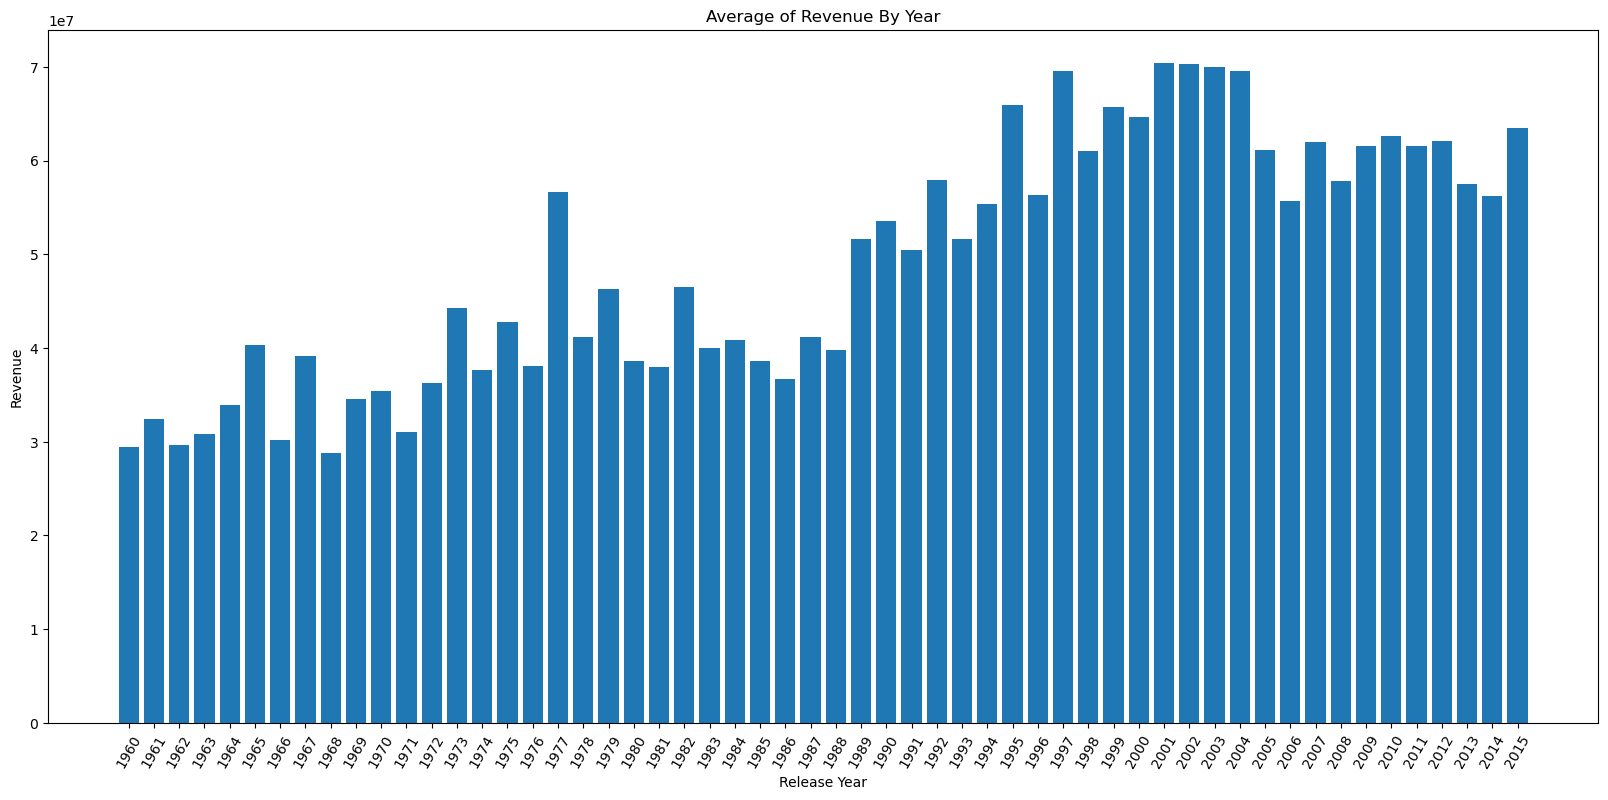

In [41]:
# Display Bar Chart For Average Of Revenue Per Each Year.
plt.figure(figsize=(20,9))
plt.bar(average_revenue.index, average_revenue)
plt.xticks(average_revenue.index, rotation=60)
plt.xlabel("Release Year")
plt.ylabel("Revenue")
plt.title("Average of Revenue By Year")
plt.show();

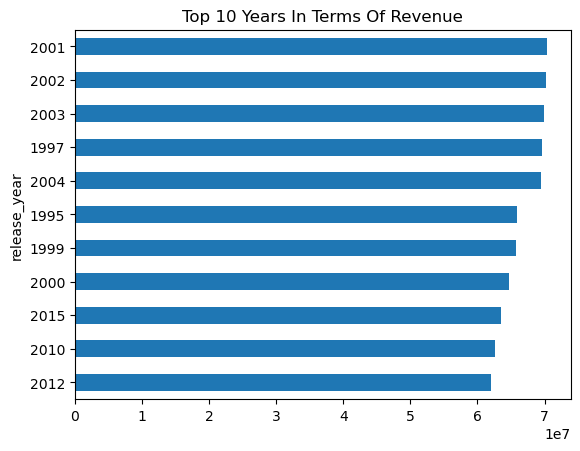

In [42]:
# A Horizontal Bar Chart For The Top 10 Years In Terms Of Revenue.
df.groupby("release_year")["revenue"].mean().sort_values(ascending=False)[10::-1].plot(kind="barh",title="Top 10 Years In Terms Of Revenue");

##### There Was The Highest Average Revenue In 2001

## Research Question 2 (Display Top 10 Highest Movie Title and Profit!)

In [43]:
# Function To Calculate Top 10 Movies Title With Highest (Column).
def calculate(column):
    top_10_column = df.nlargest(10,column)[['original_title',column]].set_index('original_title')
    return top_10_column

In [44]:
# Display Top 10 Movies Title With Highest Profit.
calculate('profit')

,profit
original_title,
Avatar,2.544506e+09
Star Wars: The Force Awakens,1.868178e+09
Titanic,1.645034e+09
Jurassic World,1.363529e+09
Furious 7,1.316249e+09
The Avengers,1.299558e+09
Harry Potter and the Deathly Hallows: Part 2,1.202818e+09
Avengers: Age of Ultron,1.125036e+09
Frozen,1.124219e+09


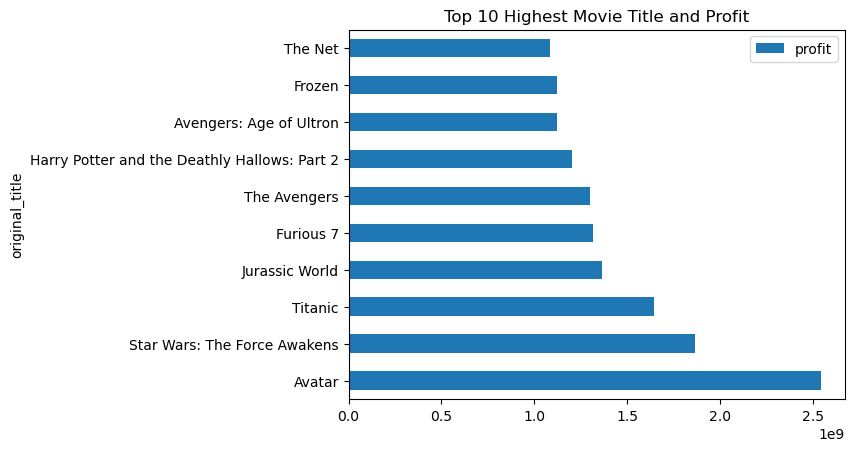

In [45]:
# Display Bar Chart For Top 10 Movies Title With Highest Profit.
calculate('profit').plot(kind="barh",title="Top 10 Highest Movie Title and Profit")
plt.show();

##### The Top Movie With Highest Profit Is "Avater".

## Research Question 3 (Display Top 10 Highest Movie Title and Revenue!)

In [46]:
# Display Top 10 Movies Title With Highest Revenue.
calculate('revenue')

,revenue
original_title,
Avatar,2.781506e+09
Star Wars: The Force Awakens,2.068178e+09
Titanic,1.845034e+09
The Avengers,1.519558e+09
Jurassic World,1.513529e+09
Furious 7,1.506249e+09
Avengers: Age of Ultron,1.405036e+09
Harry Potter and the Deathly Hallows: Part 2,1.327818e+09
Frozen,1.274219e+09


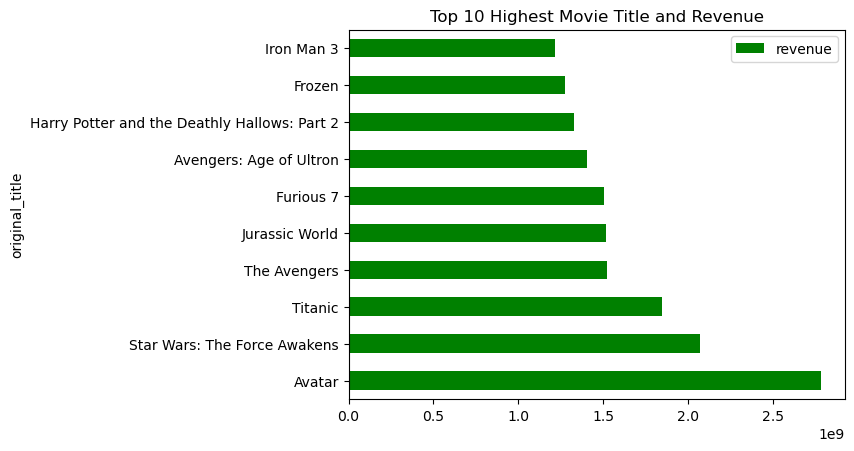

In [47]:
# Display Bar Chart For Top 10 Movies Title With Highest Revenue.
calculate('revenue').plot(kind="barh",color="green",title="Top 10 Highest Movie Title and Revenue")
plt.show();

##### The Top Movie With Highest Revenue Is "Avater".

## Research Question 4 (Display Top 10 Highest Movie Title and Budget!)

In [48]:
# Display Top 10 Movies Title With Highest Budget.
calculate('budget')

,budget
original_title,
The Warrior's Way,425000000.0
Pirates of the Caribbean: On Stranger Tides,380000000.0
Pirates of the Caribbean: At World's End,300000000.0
Avengers: Age of Ultron,280000000.0
Superman Returns,270000000.0
Tangled,260000000.0
John Carter,260000000.0
Spider-Man 3,258000000.0
The Lone Ranger,255000000.0


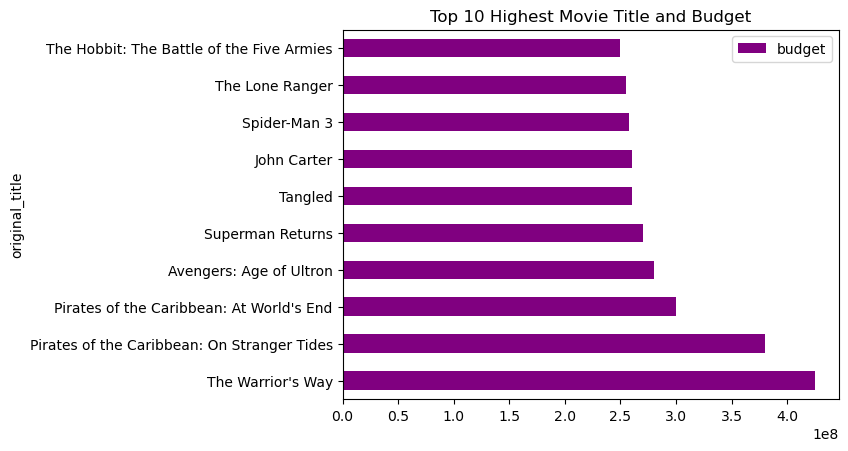

In [49]:
# Display Bar Chart For Top 10 Movies Title With Highest Budget.
calculate('budget').plot(kind="barh",color="purple",title="Top 10 Highest Movie Title and Budget")
plt.show();

##### The Top Movie With Highest Budget Is "The Warrior's Way".

## Research Question 5 (Display Top 10 Lengthy Movie Title and Runtime!)

In [50]:
df.columns

Index(['imdb_id', 'popularity', 'budget', 'revenue', 'profit',
       'original_title', 'cast', 'director', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year'],
      dtype='object')

In [51]:
# Display Top 10 Movies Title With Lengthest Runtime.
calculate('runtime')

,runtime
original_title,
The Story of Film: An Odyssey,900.0
Taken,877.0
Band of Brothers,705.0
Shoah,566.0
"North and South, Book I",561.0
Planet Earth,550.0
The Pacific,540.0
John Adams,501.0
Life,500.0


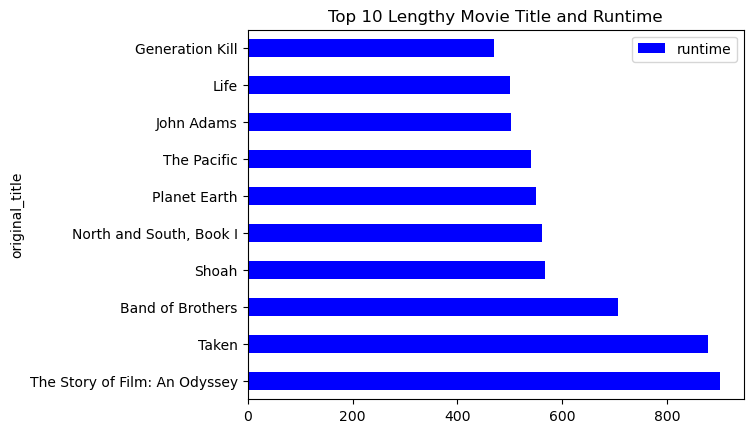

In [52]:
# Display Bar Chart For Top 10 Movies Title With Lengthest Runtime.
calculate('runtime').plot(kind="barh",color="blue",title="Top 10 Lengthy Movie Title and Runtime")
plt.show();

##### The Top Movie With Lengthest Runtime Is "The Story of Film: An Odyssey".

## Research Question 6 (Display Number Of Movies Per Year!)

In [53]:
df.columns

Index(['imdb_id', 'popularity', 'budget', 'revenue', 'profit',
       'original_title', 'cast', 'director', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year'],
      dtype='object')

In [54]:
# Display Number Of Movies Produced Per Year From This Dataset.
no_of_movies = df['release_year'].value_counts()
no_of_movies

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: release_year, dtype: int64

From This Dataset, In 2004 The Most Number Of Movies Were Produced. 

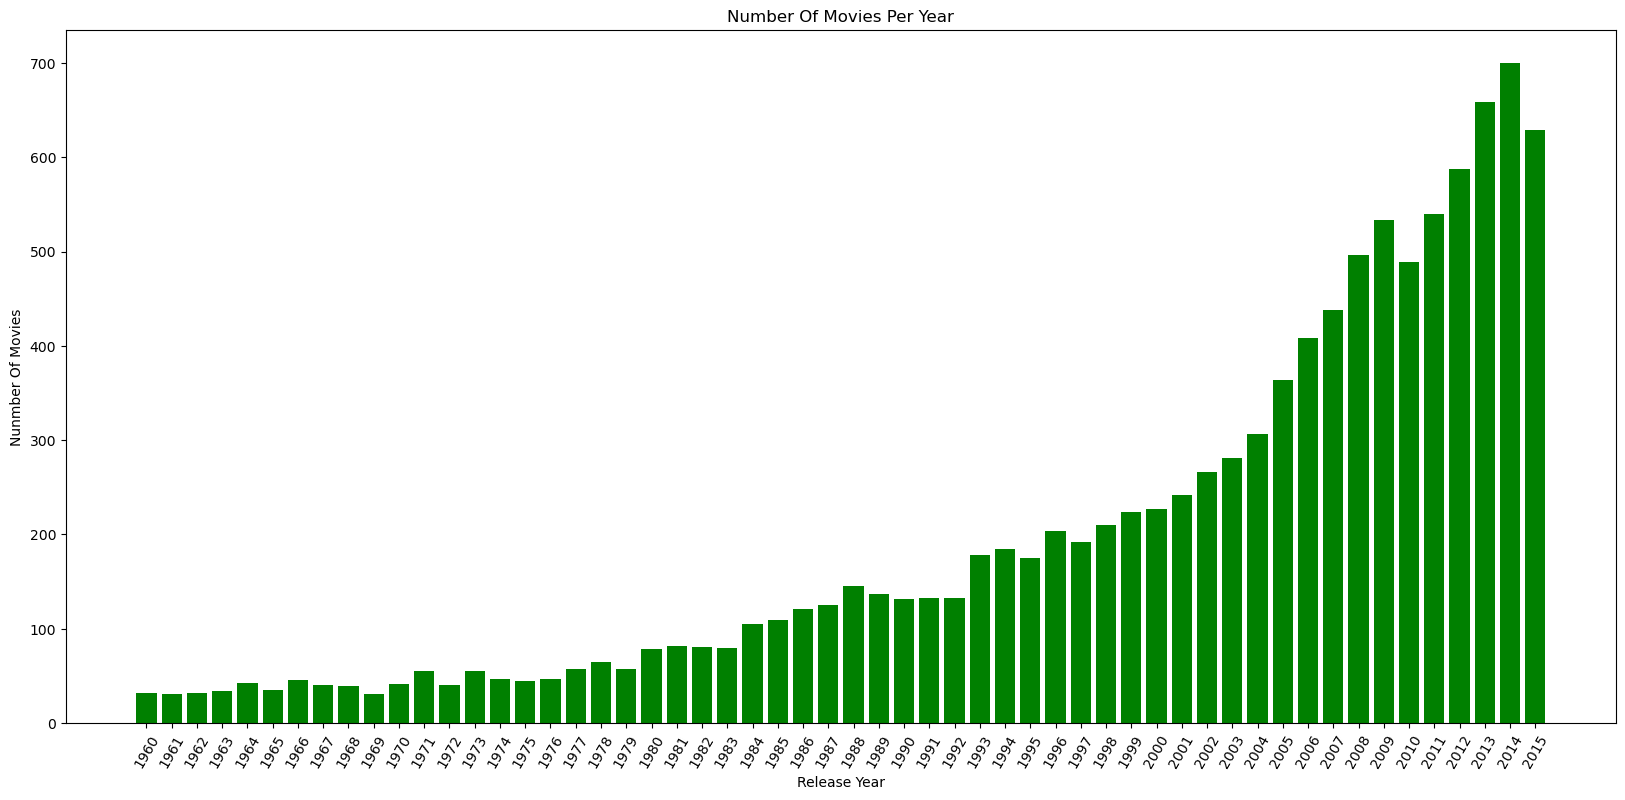

In [55]:
# Display Bar Chart For Number Of Movies Produced Per Year From This Dataset.
plt.figure(figsize=(20,9))
plt.bar(no_of_movies.index, no_of_movies,color="green")
plt.xticks(average_revenue.index, rotation=60)
plt.xlabel("Release Year")
plt.ylabel("Nunmber Of Movies")
plt.title("Number Of Movies Per Year")
plt.show();

##### The Most Number Of Movies Were Produced Is 700 Movies in 2014.

## Research Question 7  (The Average Of Runtime Movies)

In [56]:
df.columns

Index(['imdb_id', 'popularity', 'budget', 'revenue', 'profit',
       'original_title', 'cast', 'director', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year'],
      dtype='object')

In [57]:
# Display The Average Of Runtime Of Movies.
df["runtime"].mean()

102.3638545320288

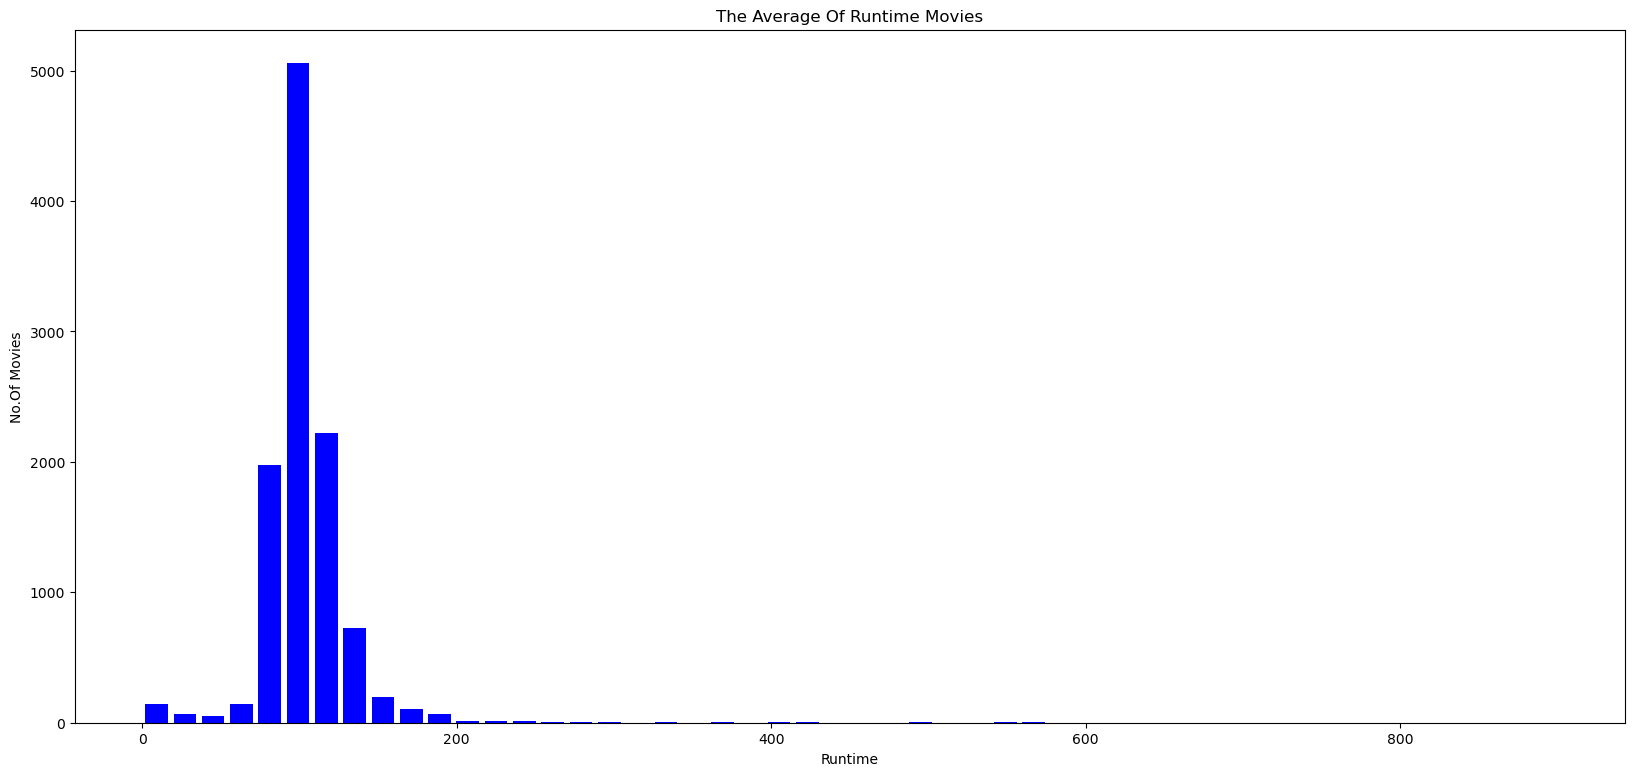

In [58]:
# Display Bar Chart For The Average Of Runtime Of Movies.
plt.figure(figsize=(20,9))
plt.hist(df["runtime"],range=(0,900),bins=50,color="blue",histtype="bar",rwidth=0.8)
plt.xlabel("Runtime")
plt.ylabel("No.Of Movies")
plt.title("The Average Of Runtime Movies")
plt.show();

##### The Average Of Movies Runtime From This Dataset Is 102.4 Minutes.

## Research Question 8  (The Most Popular Genre In TMDB Movies Dataset!)

In [59]:
df.columns

Index(['imdb_id', 'popularity', 'budget', 'revenue', 'profit',
       'original_title', 'cast', 'director', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year'],
      dtype='object')

In [60]:
# Display Genre Of Each Movie From This Dataset.
for genre in df["genres"]:
    print(genre)

Action|Adventure|Science Fiction|Thriller
Action|Adventure|Science Fiction|Thriller
Adventure|Science Fiction|Thriller
Action|Adventure|Science Fiction|Fantasy
Action|Crime|Thriller
Western|Drama|Adventure|Thriller
Science Fiction|Action|Thriller|Adventure
Drama|Adventure|Science Fiction
Family|Animation|Adventure|Comedy
Comedy|Animation|Family
Action|Adventure|Crime
Science Fiction|Fantasy|Action|Adventure
Drama|Science Fiction
Action|Comedy|Science Fiction
Action|Adventure|Science Fiction
Crime|Drama|Mystery|Western
Crime|Action|Thriller
Science Fiction|Action|Adventure
Romance|Fantasy|Family|Drama
War|Adventure|Science Fiction
Action|Family|Science Fiction|Adventure|Mystery
Action|Drama
Action|Drama|Thriller
Drama|Romance
Comedy|Drama
Action
Comedy
Crime|Comedy|Action|Adventure
Drama|Thriller|History
Action|Science Fiction|Thriller
Mystery|Drama
Crime|Action|Science Fiction
Comedy|Music
Thriller|Drama
Adventure|Horror|Comedy
Drama|Thriller
Crime|Drama|Mystery
Adventure|Animation|Com

In [61]:
# How Many Movies are there which are of genre Drama Only?
i=0
for genre in df["genres"]:
    if (genre == "Drama"):
        i+=1
print(i)   
    

712


In [62]:
# How many Total numbers of Drama genre we are having?
i=0
for genre in df["genres"]:
    if "Drama" in str(genre):
        i+=1
print(i)

4760


In [63]:
# Split Each Genre By "|"
for genre in df["genres"]:
    print(str(genre).split("|"))

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Fantasy']
['Action', 'Crime', 'Thriller']
['Western', 'Drama', 'Adventure', 'Thriller']
['Science Fiction', 'Action', 'Thriller', 'Adventure']
['Drama', 'Adventure', 'Science Fiction']
['Family', 'Animation', 'Adventure', 'Comedy']
['Comedy', 'Animation', 'Family']
['Action', 'Adventure', 'Crime']
['Science Fiction', 'Fantasy', 'Action', 'Adventure']
['Drama', 'Science Fiction']
['Action', 'Comedy', 'Science Fiction']
['Action', 'Adventure', 'Science Fiction']
['Crime', 'Drama', 'Mystery', 'Western']
['Crime', 'Action', 'Thriller']
['Science Fiction', 'Action', 'Adventure']
['Romance', 'Fantasy', 'Family', 'Drama']
['War', 'Adventure', 'Science Fiction']
['Action', 'Family', 'Science Fiction', 'Adventure', 'Mystery']
['Action', 'Drama']
['Action', 'Drama', 'Thriller']
['Drama', 'Romance']
[

In [64]:
# Unique Values on Genres Column.
genres = []
for genre in df["genres"]:
    genres+=str(genre).split("|")
    
unique_gen = set(genres)
list(unique_gen)

['Animation',
 'Science Fiction',
 'War',
 'nan',
 'Horror',
 'Music',
 'Romance',
 'Mystery',
 'Family',
 'Crime',
 'Adventure',
 'Fantasy',
 'Foreign',
 'Action',
 'Comedy',
 'Drama',
 'History',
 'Documentary',
 'Thriller',
 'Western',
 'TV Movie']

In [65]:
# How Many Movies Are There In Each Genre In TMDB Movies Dataset?
for gen in unique_gen:
    i=0
    for genre in df["genres"]:
        if gen in str(genre):
            i+=1
    print(gen, i) 

Animation 699
Science Fiction 1229
War 270
nan 23
Horror 1637
Music 408
Romance 1712
Mystery 810
Family 1231
Crime 1354
Adventure 1471
Fantasy 916
Foreign 188
Action 2384
Comedy 3793
Drama 4760
History 334
Documentary 520
Thriller 2907
Western 165
TV Movie 167


##### The Most popular Genre Is Drama,There Are 4760 Movies Of Drama In TMDB Movies Dataset.

## Research Question 9 (Display Top 10 Voted Movies In TMDB Movies Dataset!)

In [66]:
df.columns

Index(['imdb_id', 'popularity', 'budget', 'revenue', 'profit',
       'original_title', 'cast', 'director', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year'],
      dtype='object')

In [67]:
# Add a new Column called Votes.
df["votes"] = df["vote_count"] * df["vote_average"]

In [68]:
df.head(3)

,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,votes
0,tt0369610,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,36153.0
1,tt1392190,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,43913.5
2,tt2908446,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,15624.0


In [69]:
# Display Top 10 Voted movies From This Dataset.
top_10_votes = df.nlargest(10,"votes")[["original_title","votes"]].set_index("original_title")
top_10_votes

,votes
original_title,
Inception,77159.3
The Dark Knight,68299.2
The Avengers,64991.9
Avatar,60051.8
Django Unchained,56787.5
Interstellar,51984.0
The Dark Knight Rises,50422.5
The Matrix,49537.8
The Shawshank Redemption,48333.6


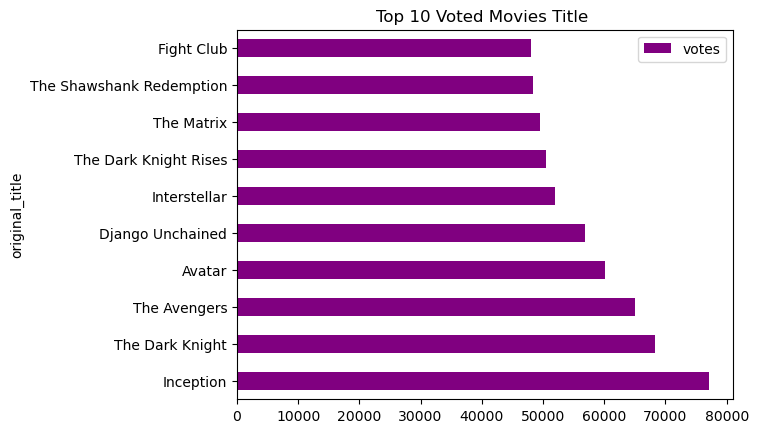

In [70]:
# Display Bar CTop 10 Voted movies From This Dataset.
top_10_votes.plot(kind="barh",color="purple",title="Top 10 Voted Movies Title ")
plt.show();

##### The Top Movie With Highest Number Of Votes Is "Inception".

<a id='conclusions'></a>
## Conclusions
>This was a very interesting data analysis, We came out with some interesting facts about movies from this dataset.

> **After This Analysis We Can Conclude Following**:
>
>1-There Was The Highest Average Revenue In 2001.
>
>2-The Top Movie With Highest Profit Is "Avater".
>
>3-The Top Movie With Highest Revenue Is "Avater".
>
>4-The Top Movie With Highest Budget Is "The Warrior's Way".
>
>5-The Top Movie With Lengthest Runtime Is "The Story of Film: An Odyssey".
>
>6-The Most Number Of Movies Were Produced in 2014.
>
>7-The Average Of Movies Runtime From This Dataset Is 102.4 Minutes.
>
>8-The Most popular Genre Is Drama,There Are 4760 Movies Of Drama In TMDB Movies Dataset.
>
>9-The Top Movie With Highest Number Of Votes Is "Inception".
>
> **Limitations**: There are a couple of limitations with our data.
>
>1-There are more than 50% of the data from (Budget&Revenue) features are zero values, All this may lead either to inaccurate analysis which may lead to inaccurate predications or biased analysis.
>
>2-The statistics used here are descriptive statistics, Not inferential, Meaning that we did't creat any hypotheses or controlled experiments or inferences with our data.
>
>3-As i mentioned before the budget and revenue columns don't have currency unit , It might be possible different movies have budget in different currency according to the country they are produced in.



